In [ ]:
# Zach Quinn
# DSC 550
# 19 July 2020
# File description: Creates decision tree.
# File function: Uses sk learn library to plot and draw a decision tree for UCI caesarian data set. 

In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
import graphviz
import collections

In [33]:
# Creates feature names
c_dat_feature_names = ['age', 'delivery_number', 'delivery_time', 'blood_pressure', 'heart_problems', 'caesarian']
# Load data using pandas and append feature names as column headers. 
c_dat = pd.read_csv('caesarian.csv', header=None, names=c_dat_feature_names, skiprows=1)

In [34]:
c_dat.head(3)

,age,delivery_number,delivery_time,blood_pressure,heart_problems,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0


In [35]:
# Creates feature columns
c_dat_feature = ['delivery_number', 'delivery_time', 'blood_pressure', 'heart_problems']
# Assigns features to variable 'X.'
X = c_dat[c_dat_feature]
# Assigns target to variable 'y.'
y = c_dat['caesarian']

In [36]:
# Partition the data: 75:25 split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [48]:
# Creates models

c_dat_clf = tree.DecisionTreeClassifier()
c_dat_clf = c_dat_clf.fit(X_train, y_train)
y_pred = c_dat_clf.predict(X_test)

In [49]:
# Initializes accuracy test 
print("Accuracy of model is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of model is:  0.45


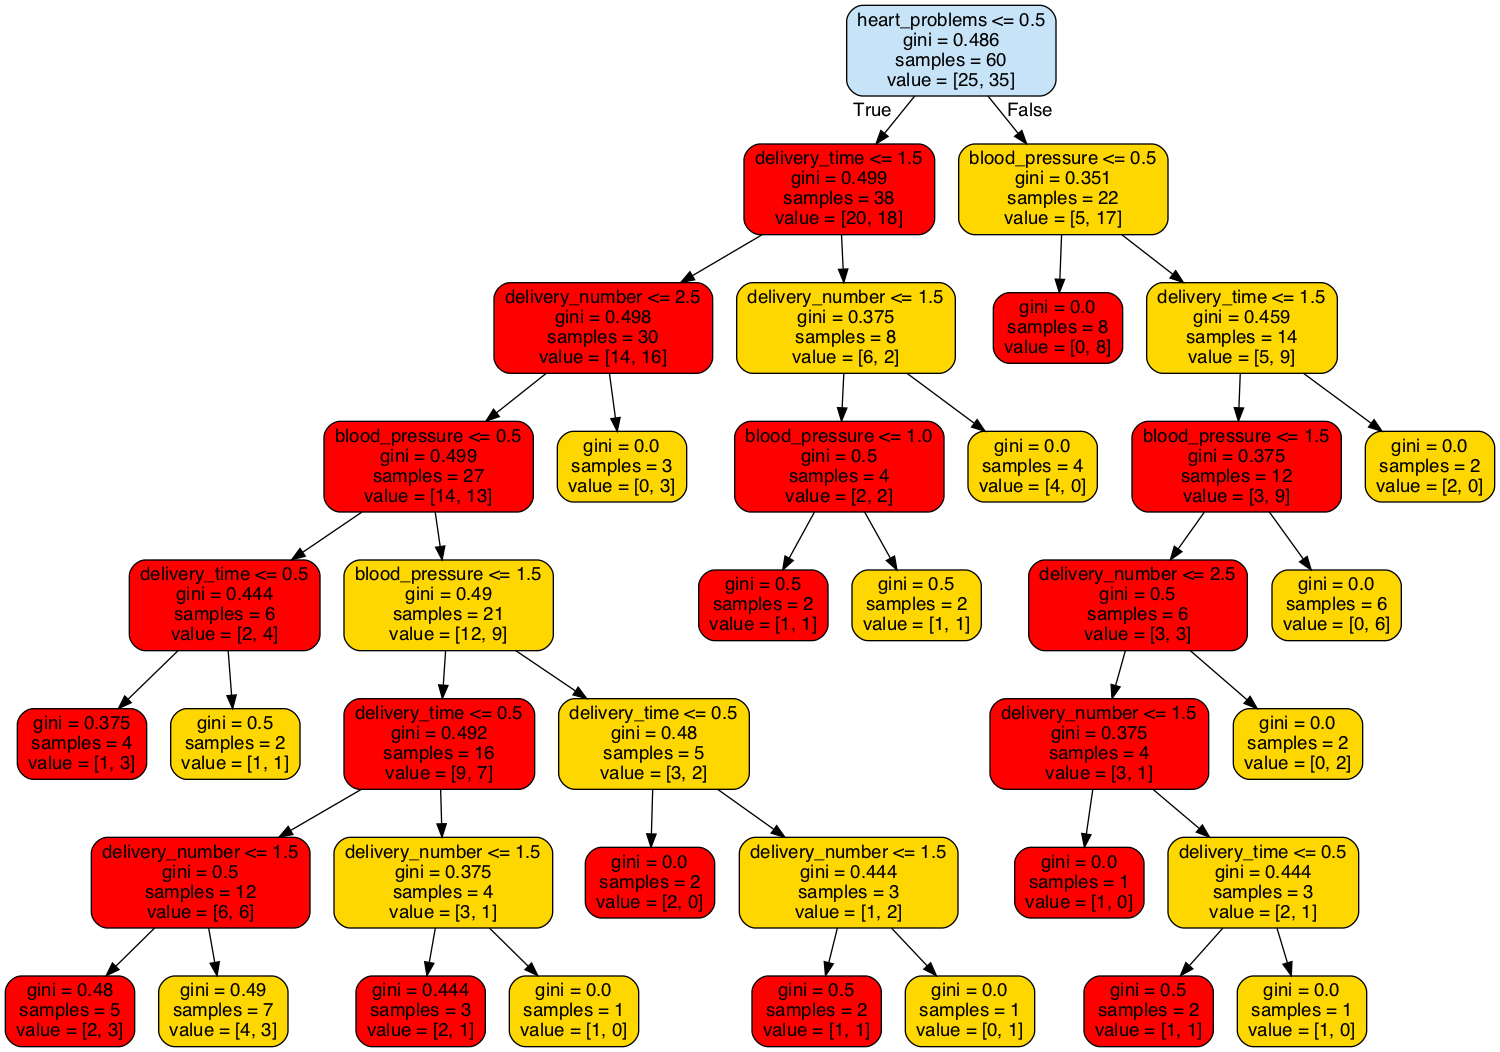

In [58]:
# Create decision tree 

c_dot_data = tree.export_graphviz(c_dat_clf, feature_names = c_dat_feature, out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(c_dot_data)
colors = ('red', 'gold')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges: 
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(graph.create_png())
#graph.write_png('tree.png')

In [60]:
# For max depth = 2 
c_dat_mod_1 = tree.DecisionTreeClassifier(max_depth = 2)

# Fit the model 

c_dat_mod_1 = c_dat_mod_1.fit(X_train, y_train)
y_pred_mod_1 = c_dat_mod_1.predict(X_test)

In [62]:
print("Accuracy of first max depth model is: ", metrics.accuracy_score(y_test, y_pred_mod_1))

Accuracy of first max depth model is:  0.55


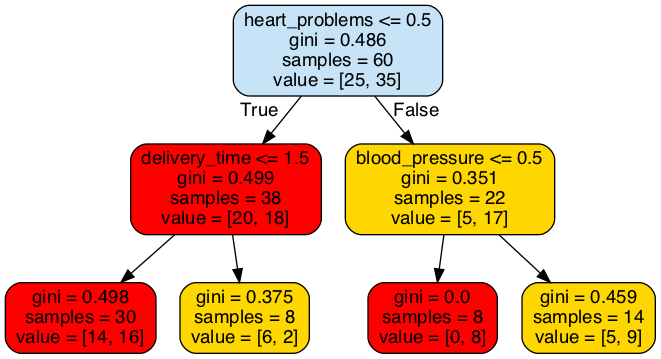

In [68]:
# Decision tree for max depth = 2 
c_dot_data_1 = tree.export_graphviz(c_dat_mod_1, feature_names = c_dat_feature, out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(c_dot_data_1)
colors = ('red', 'gold')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges: 
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(graph.create_png())
#graph.write_png('tree.png')

In [70]:
# Decision tree for max depth = 4 

# Fit model 

c_dat_mod_2 = tree.DecisionTreeClassifier(max_depth=4)
c_dat_mod_2 = c_dat_mod_2.fit(X_train, y_train)
y_pred_2 = c_dat_mod_2.predict(X_test)

In [71]:
# Test accuracy 
print("Accuracy of this model is: ", metrics.accuracy_score(y_test, y_pred_2))

Accuracy of this model is:  0.65


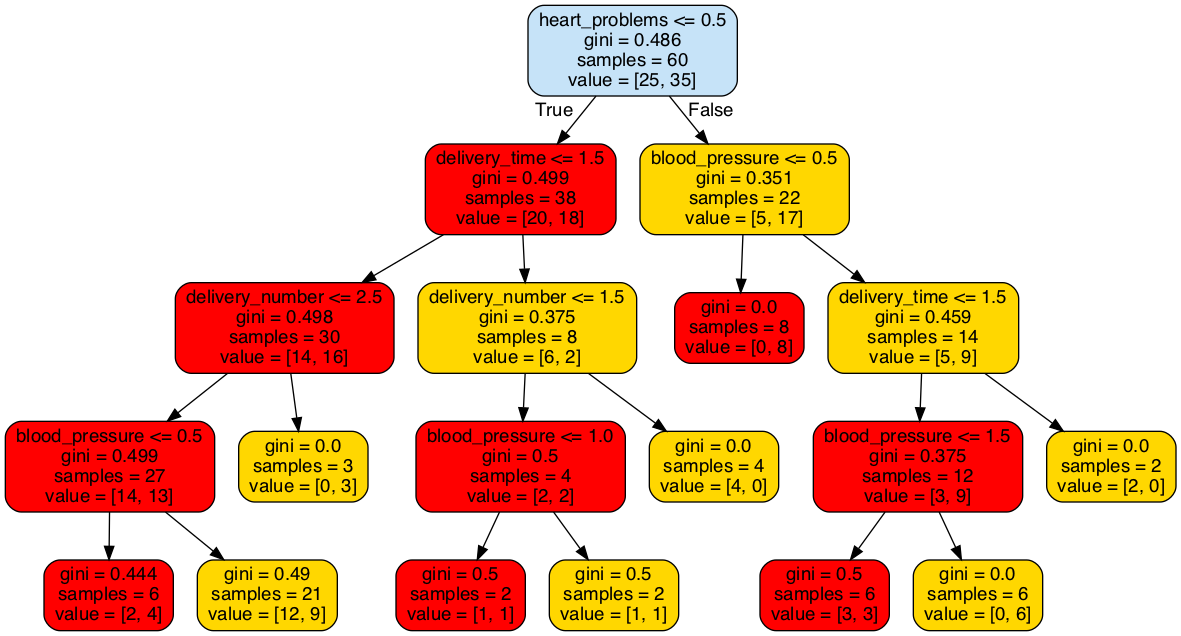

In [72]:
# Draw tree 
c_dot_data_2 = tree.export_graphviz(c_dat_mod_2, feature_names = c_dat_feature, out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(c_dot_data_2)
colors = ('red', 'gold')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges: 
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(graph.create_png())
#graph.write_png('tree.png')

In [ ]:
# Varying the depth of the resultant tree allows data scientists to broadly or narrowly focus on individual nodes.
# Increasing max_depth reduces the overall training error. 